# Pandas

### How we did it in the past

In [1]:
import csv
numbers=[]
gender = []

f = open("C:/Users/heathes/Documents/Visual Studio 2015/Projects/PyTennesse/PyTennesse/dataset.csv")
csv_f = csv.reader(f)
for  row in csv_f:
    numbers.append(row[2])
    gender.append(row[3])
    
print numbers, gender


['number', 'C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2', 'C20', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'] ['Gender', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female']


In [2]:
lines = []
with open('C:/Users/heathes/Documents/Visual Studio 2015/Projects/PyTennesse/PyTennesse/dataset.csv') as f:
    reader = csv.reader(f)
    your_list = list(reader)

# print your_list

for nested_list in your_list:
    print '\t'.join(nested_list)


	transcript	number	Gender	Education	Income	Age	Country	Continent	Class
0	so the first thing that we're going to do is i'm going to tell you a little bit about myself and the research that i'm working on, and then i'll give you a chance to ask any questions that you may have, and then we can get started with our interview. does that sound good with you? yeah, that is fine with me. ok, great. so my name is , and i'm an undergraduate student at duke university. i'm part of the research team... wait, i didn't... i'm sorry? i didn't quite get your...you said your name is? . . c-l... a-r-a. ok, that is fine. yes. and i'm interested in learning more about the coursera student experience. in the next 30 minutes, i will ask you some questions about yourself, your participation in the course, and how you feel about coursera in general. you can tell me as much or as little as you would like. if you prefer not to answer some of the questions, then that is perfectly fine. your privacy is important 

### Setting up the Environment

In [3]:
import pandas as pd
import numpy as np
import os
import re
from nltk import tokenize
from vaderSentiment.vaderSentiment import sentiment as vaderSentiment
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the Transcripts and removing StopWords

In [4]:
path = "C:/Users/heathes/Desktop/all transcripts"

list = []
users = []

remove_list = ["interviewer","interviewee""shapiro","inaudible","heather","castingwords","par","line","silence", "course","coursera"]
 
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.txt'):
            f = open(path + '/' + file)
            content = f.readlines()
            content = ''.join([i for i in content if i not in remove_list])

            content = ''.join([i if ord(i) < 128  else ' ' for i in content])

            content = content.decode('utf-8', 'ignore').encode('utf-8')
            content = re.sub("/", " ", content)
            content = re.sub("@", " ", content)
            content = re.sub("\\|", " ", content)
            content = re.sub("\n","", content)
            content = content.lower()
            content = re.sub("interviewer","",content)
            content = re.sub("interviewee","",content)
            content = re.sub("massive open online courses", "MOOCs", content)
            content = re.sub("massive open online course", "MOOC",content)
            content = re.sub("silence","",content)
            content = re.sub("á","",content)
            content = content.strip()
            list.append(content)
            
            userName = re.sub(".txt","",file)
            if userName == 'S10\xa0':
                userName = "S10"
               
            users.append(userName)



### Creating and Merging DataFrames

In [5]:
classification = pd.read_csv("C:/Users/heathes/Dropbox/HS-CourseraInterviews/data/Classification Assignments-People.csv")

df = pd.DataFrame()

df['transcript'] = list
df['number'] = users


df = pd.merge(df, classification, on = "number")
df = df.drop("Name",1)
    

In [6]:
df['transcript'][0]

'so the first thing that we\'re going to do is i\'m going to tell you a little bit about myself and the research that i\'m working on, and then i\'ll give you a chance to ask any questions that you may have, and then we can get started with our interview. does that sound good with you? yeah, that is fine with me. ok, great. so my name is , and i\'m an undergraduate student at duke university. i\'m part of the research team... wait, i didn\'t... i\'m sorry? i didn\'t quite get your...you said your name is? . . c-l... a-r-a. ok, that is fine. yes. and i\'m interested in learning more about the coursera student experience. in the next 30 minutes, i will ask you some questions about yourself, your participation in the course, and how you feel about coursera in general. you can tell me as much or as little as you would like. if you prefer not to answer some of the questions, then that is perfectly fine. your privacy is important to me, so after this interview is over, your name and email ad

## Sentiment Analysis GUI

### Setting up the environment

In [7]:
from vaderSentiment.vaderSentiment import sentiment as vaderSentiment 
from Tkinter import *

### Creating the Class

In [8]:
class Application(Frame):
    def __init__(self,master):
        Frame.__init__(self,master)
        self.grid()
        self.create_widgets()

    def create_widgets(self):
        self.instruction = Label(self,text ="Find the Sentiment Score of your sentence!")
        self.instruction.grid(row=0, column=0, columnspan = 2, sticky= W)

        self.sentence = Label(self, text = "Enter a sentence: ")
        self.sentence.grid(row=1, column=0, sticky=W)

        self.entry = Entry(self)
        self.entry.grid(row = 1, column=1,sticky=W)

        self.submit_button= Button(self,text="submit", command=self.reveal)
        self.submit_button.grid(row=2, column=0, sticky = W)

        self.text = Text(self,width=35,height = 5, wrap = WORD)
        self.text.grid(row=3, column = 0, columnspan = 2, sticky = W)

        self.clear_button = Button(self, text = "Clear text", command =self.clear_text)
        self.clear_button.grid(row=2, column=1, sticky=W)
    def reveal(self):
        self.text = Text(self,width=35,height = 5, wrap = WORD)
        self.text.grid(row=3, column = 0, columnspan = 2, sticky = W)
        sentences = self.entry.get()
       
        message = vaderSentiment(sentences)
       
        self.text.insert(0.0,"This is the sentiment score\n" + str(message)+ "\n ")
            
    def clear_text(self):
        self.text = Text(self,width=35,height = 5, wrap = WORD)
        self.text.grid(row=3, column = 0, columnspan = 2, sticky = W)

### Starting up the GUI

In [9]:
root = Tk()
root.title("Buttons")

app = Application(root)

root.mainloop()

### Finding the average sentiment for every transcript

In [10]:
for index, row in df.iterrows():
    print index
    sentences = tokenize.sent_tokenize(row["transcript"])
    sumComp = 0
    sumPos = 0
    sumNeg = 0
    tot = len(sentences)
    pos = 0
    neg = 0
    neu = 0
    compPos = 0
    compNeg = 0
    compNeutral = 0
    if row["Education"]=="Some College" or row["Education"]=="Less than HS" or row["Education"]=="Associate":
        df.loc[index,"Education"]="Less than Bachelors"
    if row["Age"]=="18-24" or row["Age"]=="25-34":
        df.loc[index, "Age"] = "18-34"
    for sentence in sentences: 
        vs = vaderSentiment(sentence)
        sumComp += vs['compound']
        sumPos += vs['pos']
        sumNeg += vs['neg']
        if vs['pos'] > .25:
            pos +=1
        if vs['neg'] > .25:
            neg += 1
        if vs['neu'] > .5:
            neu +=1
        if vs['compound'] > .25:
            compPos +=1
        if vs['compound'] < -.25:
            compNeg +=1
        if -.25<= vs['compound'] <.25:
            compNeutral +=1
    df.loc[index,'compound'] = sumComp / tot
    df.loc[index,'compNeutral'] = compNeutral
    df.loc[index, 'comppos'] = compPos
    df.loc[index, 'compneg'] = compNeg
    df.loc[index,'percentPos'] = sumPos / tot
    df.loc[index,'Total'] = tot

In [11]:
df.to_csv("C:/Users/heathes/Documents/Visual Studio 2015/Projects/PyTennesse/PyTennesse/dataset2.csv")

In [12]:
df["compound"].describe()

count    36.000000
mean      0.165569
std       0.030352
min       0.116433
25%       0.141656
50%       0.164944
75%       0.188596
max       0.225734
Name: compound, dtype: float64

## Analysis

In [13]:
df = pd.read_csv("C:/Users/heathes/Documents/Visual Studio 2015/Projects/PyTennesse/PyTennesse/dataset.csv")

#print df

dfFull = pd.read_csv("C:/Users/heathes/Documents/Visual Studio 2015/Projects/PyTennesse/PyTennesse/dataset2.csv")

In [14]:
dfFull =dfFull.drop('Unnamed: 0',1)
dfFull

,transcript,number,Gender,Education,Income,Age,Country,Continent,Class,compound,compNeutral,comppos,compneg,percentPos,Total
0,so the first thing that we're going to do is i...,C1,Male,Graduate,20000-34999,45-54,Namibia,Africa,Chem,0.166316,95,75,15,0.143930,187
1,"can you hear me all right now? oh, yeah. you'v...",C10,Female,Less than Bachelors,20000-34999,18-34,USA,America,Chem,0.116433,205,126,39,0.115685,372
2,...a little bit about myself and the project t...,C11,Male,Less than Bachelors,35000-49999,18-34,USA,America,Chem,0.168946,151,104,17,0.149593,273
3,...all right. the first thing i guess we're go...,C12,Male,Less than Bachelors,75000-99999,18-34,USA,America,Chem,0.148773,186,126,31,0.107742,345
4,...and then i'll give you a chance to ask any ...,C13,Female,Graduate,75000-99999,18-34,USA,America,Chem,0.129685,134,98,30,0.116621,264
5,"hi, this is calling from duke university for ...",C14,Male,Bachelor,<20000,18-34,USA,America,Chem,0.167119,163,133,31,0.144682,327
6,"hi, this is calling from duke university for ...",C15,Male,Bachelor,50000-74999,35-44,USA,America,Chem,0.188035,134,107,20,0.169095,262
7,i'm just going to tell you a little bit about ...,C16,Male,Graduate,100000+,55+,USA,America,Chem,0.124935,90,66,22,0.135161,180
8,"...yes, the audio's very good. ok, good. great...",C17,Female,Graduate,100000+,55+,USA,America,Chem,0.161708,167,133,28,0.152280,328
9,[laughs] now we can get started. the first que...,C18,Female,Graduate,100000+,55+,USA,America,Chem,0.162820,130,105,20,0.133871,256


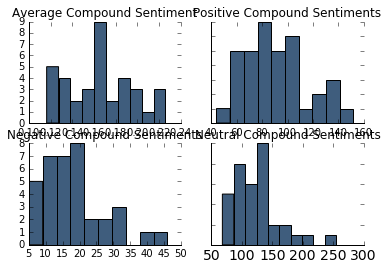

In [15]:
fig, axes = plt.subplots(2, 2)
axes[0,0].hist(dfFull['compound'], color="#3F5D7D")
axes[0,0].set_title("Average Compound Sentiment")
# axes[0,0].annotate(dfFull['compound'].describe(), xy=(1, 0), xycoords='axes fraction', fontsize=14,
#                 xytext=(-5, 140), textcoords='offset points',
#                 ha='right', va='bottom')
axes[0,0].spines["top"].set_visible(False)  
axes[0,0].spines["right"].set_visible(False) 



axes[0,1].hist(dfFull['comppos'], color="#3F5D7D")
axes[0,1].set_title("Positive Compound Sentiments")
# axes[0,1].annotate(dfFull['comppos'].describe(), xy=(1, 0), xycoords='axes fraction', fontsize=14,
#                 xytext=(-5, 140), textcoords='offset points',
#                 ha='right', va='bottom')
axes[0,1].spines["top"].set_visible(False)  
axes[0,1].spines["right"].set_visible(False)

axes[1,0].hist(dfFull['compneg'], color="#3F5D7D")
axes[1,0].set_title("Negative Compound Sentiments")
# axes[1,0].annotate(dfFull['compneg'].describe(), xy=(1, 0), xycoords='axes fraction', fontsize=14,
#                 xytext=(-5, 140), textcoords='offset points',
#                 ha='right', va='bottom')

axes[1,0].spines["top"].set_visible(False)  
axes[1,0].spines["right"].set_visible(False) 

axes[1,1].hist(dfFull['compNeutral'], color="#3F5D7D")
axes[1,1].set_title("Neutral Compound Sentiments")
# axes[1,1].annotate(dfFull['compNeutral'].describe(), xy=(1, 0), xycoords='axes fraction', fontsize=14,
#                 xytext=(-5, 140), textcoords='offset points',
#                 ha='right', va='bottom')
axes[1,1].spines["top"].set_visible(False)  
axes[1,1].spines["right"].set_visible(False)

# plt.setp([a.get_xticklabels() for a in axes[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axes[:, 1]], visible=False)
plt.xticks(fontsize=14)  


plt.show()

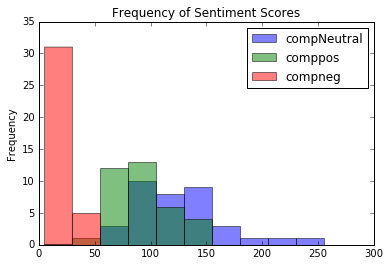

In [16]:
dfFull.ix[:,-5:-2].plot(kind='hist', alpha = 0.5, stacked=False)
plt.title("Frequency of Sentiment Scores")
plt.show()

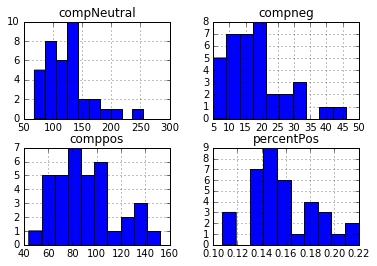

In [17]:
dfFull.ix[:,-5:-1].hist()

plt.show()

In [18]:
dfFull["Continent"]= dfFull["Continent"].astype("category", categories = ["America", "Africa","Asia", "Europe"], ordered = True)

In [19]:
dfFull["Income"]=dfFull["Income"].astype("category", categories = ["20000-34999","<20000","35000-49999", "50000-74999", "75000-99999","100000+"], ordered = True)

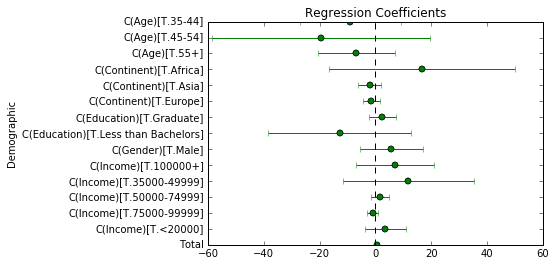

In [20]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='comppos~Total+C(Age)+C(Gender)+C(Education)+C(Income)+C(Continent)', data=dfFull).fit()

# print the coefficients
lm.params.keys
# lm.params.values

x = lm.params.keys().tolist()
y = lm.params.values
upper = lm.conf_int()[1].tolist()
lower =lm.conf_int()[0].tolist()

dfLM = pd.DataFrame()

dfLM["x"]=x
dfLM['y']=y
dfLM["upper"]= upper
dfLM["lower"]= lower

dfLM2= dfLM.sort_values(by="x", ascending=False)

dfLM2['y']= dfLM2['y']
dfLM2=dfLM2[dfLM2.x !="Intercept"]

y_pos = np.arange(len(x)-1)
error = (dfLM2["upper"]+dfLM2["lower"])
dfLM2["error"] = error

# plt.barh(y_pos, dfLM2['y'], xerr=error, align='center', alpha=0.4)
plt.plot(dfLM2['y'],y_pos, "o")
plt.errorbar(dfLM2['y'],y_pos,xerr=error.tolist(),fmt = 'o')
plt.yticks(y_pos, dfLM2['x'])
plt.ylabel('Demographic')
plt.title('Regression Coefficients')
plt.axvline(0, color='k', linestyle='--')


plt.show()


In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comppos   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     25.83
Date:                Sun, 27 Mar 2016   Prob (F-statistic):           7.61e-10
Time:                        14:14:35   Log-Likelihood:                -112.65
No. Observations:                  36   AIC:                             257.3
Df Residuals:                      20   BIC:                             282.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                              -8.9379     10.052     -0.889      0.385       -29.907    12.031
C(Age)[T.35-44]                        -9.0473      4.864     -1.860      0.078       -19.193     1.099
C(Age)[T.45-54]                       -19.5313      7.853     -2.487      0.022       -35.912    -3.151
C(Age)[T.55+]                          -6.8937      7.054     -0.977      0.340       -21.609     7.821
C(Gender)[T.Male]                       5.7049      3.169      1.800      0.087        -0.905    12.315
C(Education)[T.Graduate]                2.4541      4.075      0.602      0.554        -6.046    10.954
C(Education)[T.Less than Bachelors]   -12.8856      5.535     -2.328      0.031       -24.432    -1.339
C(Income)[T.<20000]                     3.5910      4.696      0.765      0.453        -6.204    13.386
C(Income)[T.35000-49999]               11.7159      6.717      1.744      0.096        -2.296    25.728
C(Income)[T.50000-74999]                1.6078      5.527      0.291      0.774        -9.921    13.137
C(Income)[T.75000-99999]               -1.0304      5.869     -0.176      0.862       -13.274    11.213
C(Income)[T.100000+]                    6.9600      6.421      1.084      0.291        -6.433    20.353
C(Continent)[T.Africa]                 16.6796      7.693      2.168      0.042         0.632    32.727
C(Continent)[T.Asia]                   -2.1050      3.927     -0.536      0.598       -10.296     6.087
C(Continent)[T.Europe]                 -1.5040      4.185     -0.359      0.723       -10.233     7.225
Total                                   0.4154      0.029     14.141      0.000         0.354     0.477
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.282
Skew:                           0.191   Prob(JB):                        0.869
Kurtosis:                       2.795   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Word Cloud Tutorial

### Setting up the environment

In [22]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
import matplotlib

#d = path.dirname(__file__)
d = "C:/Users/heathes/Documents/Visual Studio 2015/Projects/PythonApplication1/PythonApplication1/"
# Read the whole text.
#text = open("C:/Users/heathes/Desktop/all transcripts/C1.txt").read()



In [23]:
df = pd.read_csv("C:/Users/heathes/Documents/Visual Studio 2015/Projects/PyTennesse/PyTennesse/dataset2.csv")
text = " ".join(df['transcript'].astype(str))
remove = ["interviewer","interviewee""shapiro","inaudible","heather","castingwords","par","line","silence","course","coursera","courses","lot", "like"]
STOPWORDS.add("said")
STOPWORDS.add("course")
STOPWORDS.add("courses")
STOPWORDS.add("coursera")
STOPWORDS.add("really")
STOPWORDS.add("one")
text = ' '.join(filter(lambda x: x.lower() not in remove,  text.split()))
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg

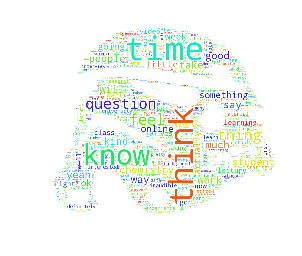

In [28]:
stormtrooperMask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=stormtrooperMask, 
               stopwords=STOPWORDS.add("said"))
# generate word cloud
wc.generate(text)


# store to file
wc.to_file(path.join(d, "stormMask.png"))

# show
plt.imshow(wc)
plt.axis("off")
# plt.figure()
# plt.imshow(alice_mask, cmap=plt.cm.gray)
# plt.axis("off")
plt.show()
